In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance  # distance metrics

## Course characterization

4th year students wanted to help 1st year students in the process of choosing elective courses. To do so, they gathered data on two parameters for 20 courses: interest level, and difficulty level. Both parameters are measured on a scale from 1-10, from easy to hard. The students wants to divide the courses to three groups, so  courses which are similar in both parameters would be in the same group.
<br>
The following graph shows all courses. Each dot is a course, the x axis is the difficulty level and the y axis is the interest level of the course.

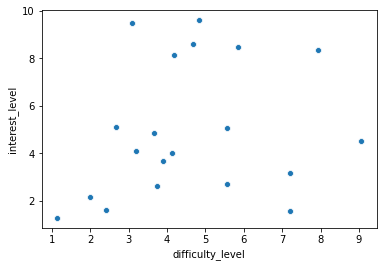

In [2]:
# read data
clustering_df = pd.read_csv('..\\clustering_example_scale.csv')
# plot courses by difficulty and interest levels - each point is represents a course
ax = sns.scatterplot(x='difficulty_level', y='interest_level', data=clustering_df)  

The students chose to use clustering methods that divide the data into groups.
Nicole and Jennifer used two different clustering methods and got two different group arangements, as shown in the graph below.
Like before, each dot represents a course. The colors represent different clusters. for example the orange group, represents one cluster.

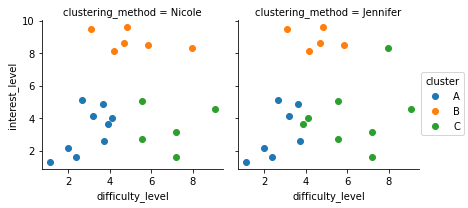

In [3]:
# plot the data
g = sns.FacetGrid(clustering_df, col="clustering_method", hue="cluster")
g.map(plt.scatter, "difficulty_level", "interest_level")
g.add_legend(frameon=True);

### Exercise 1:

Which cluster ensemble seems better? Nicole's or Jennifer's?

Why?

### Answer

Nicole's seems neater: better seperation between clusters (they are less intertwined)

### Exercise 2:

Come up with a scoring measure (or multiple scoring measures) for how good a cluster is. 

This scoring measure needs to get as input all of the dots and the cluster they belong to, and give as output a numerical value.

You can come up with your own measure, or search for one on the internet. 

Describe in words this grading measure, state the measure's purpose (what makes one cluster ensamble better than a different one), and how you would compute it.

### Answer
1. For each pair of clusters, calculate the distance between the centres of each cluster, Sum those distances.
2. For each cluster, sum the square root distances from the centre to each datapoint in that cluster, Sum this calculation for all clusters.
3. For each cluster pair, calculate the minimal distance between two points that belong to different clusters, Sum this calculation for all cluster pairs.

Now, write code to compute your grading measure and test it on Nicole's and Jennifer's cluster ensamble.

You have two supporting functions at your disposal:
- A function that returns all points that belong to a specific cluster. Given all points, a clustering method, and the name of the specific cluster.
- A function that returns the distance between two points.

In [4]:
def get_all_points_in_cluster(clusters_df, cluster_name, clustering_method):
    '''
    This function gets as input a dataframe with clusters, the name of the clustering method 
    and the name of a cluster, and returns all points in that cluster as a numpy array
    '''
    # filter dataframe to get only points from the appropriate clustering method and appropriate cluster
    cluster_df = clusters_df[(clusters_df['cluster'] == cluster_name) & (clusters_df['clustering_method'] == clustering_method)]
    # get only the ranking columns
    cluster_points = cluster_df[['difficulty_level','interest_level']]
    # convert columns to numpy array
    cluster_points = cluster_points.values
    return cluster_points

In [5]:
# example use of 'get_all_points_in_cluster' - 
Jennifer_A_points = get_all_points_in_cluster(clustering_df,'A','Jennifer')
print(Jennifer_A_points)

[[1.13425738 1.2862267 ]
 [1.99519948 2.17617611]
 [2.40064391 1.61374775]
 [2.66863848 5.12427238]
 [3.1878366  4.10367405]
 [3.65565886 4.84288996]
 [3.73023531 2.61469753]]


In [6]:
# you can also use the 'distance.euclidean' function to get the distance between two points
# example use of euclidean distance:
distance_between_first_two_points = distance.euclidean(Jennifer_A_points[0], Jennifer_A_points[1])
print(distance_between_first_two_points)

1.2382371569240433


As explained in the measurements, there is a dependency on the clusters cennters.
The following graphs demonstrates where are the centers of the clusters for each of the methods

[Text(0, 0.5, 'interest_level'), Text(0.5, 0, 'difficulty_level')]

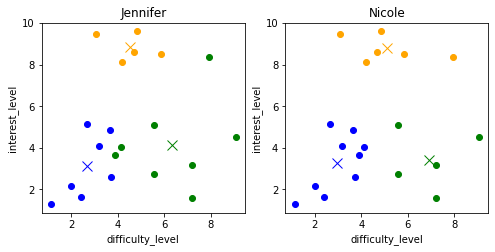

In [7]:
def build_mean_graph(clustering_df, method, ax_plt):
    a_cluster = get_all_points_in_cluster(clustering_df,'A',method)
    b_cluster = get_all_points_in_cluster(clustering_df,'B',method)
    c_cluster = get_all_points_in_cluster(clustering_df,'C',method)

    xa = a_cluster[:,0]
    ya = a_cluster[:,1]
    xb = b_cluster[:,0]
    yb = b_cluster[:,1]
    xc = c_cluster[:,0]
    yc = c_cluster[:,1]
    
    a_mean = np.average(a_cluster, axis=0)
    b_mean = np.average(b_cluster, axis=0)
    c_mean = np.average(c_cluster, axis=0)

    ax_plt.plot(xa,ya,'o',color='blue')
    ax_plt.plot(xb,yb,'o',color='orange')
    ax_plt.plot(xc,yc,'o',color='green')
    
    ax_plt.plot(a_mean[0], a_mean[1], 'x', color='blue', markersize=10)
    ax_plt.plot(b_mean[0], b_mean[1], 'x', color='orange', markersize=10)
    ax_plt.plot(c_mean[0], c_mean[1], 'x', color='green', markersize=10)
    

plt.rc('font', size=10)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(3.5)
fig.set_figwidth(8)

build_mean_graph(clustering_df,'Jennifer', ax1)
ax1.set_title('Jennifer')
ax1.set(xlabel='difficulty_level', ylabel='interest_level')
build_mean_graph(clustering_df,'Nicole', ax2)
ax2.set_title('Nicole')
ax2.set(xlabel='difficulty_level', ylabel='interest_level')

Write your scoring measure (or multiple scoring measures) in the next cells.

In [8]:
def measure_clustering_goodness_1(clustering_df, clustering_method):
    points_A=get_all_points_in_cluster(clustering_df,"A",clustering_method)
    points_B=get_all_points_in_cluster(clustering_df,"B",clustering_method)
    points_C=get_all_points_in_cluster(clustering_df,"C",clustering_method)
    mean_A=points_A.mean(axis=0)
    mean_B=points_B.mean(axis=0)
    mean_C=points_C.mean(axis=0)
    return distance.euclidean(mean_A,mean_B)+distance.euclidean(mean_A,mean_C)+distance.euclidean(mean_B,mean_C)

In [9]:
def measure_clustering_goodness_2(clustering_df, clustering_method):
    points_A=get_all_points_in_cluster(clustering_df,"A",clustering_method)
    points_B=get_all_points_in_cluster(clustering_df,"B",clustering_method)
    points_C=get_all_points_in_cluster(clustering_df,"C",clustering_method)
    mean_A=points_A.mean(axis=0)
    mean_B=points_B.mean(axis=0)
    mean_C=points_C.mean(axis=0)
    dist=0
    dist_sum=0
    for a in range(len(points_A)):
        dist+=distance.euclidean(points_A[a],mean_A)**2
    dist_sum+=dist**0.5
    
    dist=0
    for b in range(len(points_B)):
        dist+=distance.euclidean(points_B[b],mean_B)**2
    dist_sum+=dist**0.5
    
    dist=0
    for c in range(len(points_C)):
        dist+=distance.euclidean(points_C[c],mean_C)**2
    dist_sum+=dist**0.5
    return dist_sum

In [10]:
def measure_clustering_goodness_3(clustering_df, clustering_method):
    points_A=get_all_points_in_cluster(clustering_df,"A",clustering_method)
    points_B=get_all_points_in_cluster(clustering_df,"B",clustering_method)
    points_C=get_all_points_in_cluster(clustering_df,"C",clustering_method)
    dist_A_B=distance.euclidean(points_A[0],points_B[0])
    dist_A_C=distance.euclidean(points_A[0],points_C[0])
    dist_B_C=distance.euclidean(points_B[0],points_C[0])
    for a in range(len(points_A)):
        for b in range (len(points_B)):
            if (distance.euclidean(points_A[a],points_B[b])<dist_A_B):
                dist_A_B=distance.euclidean(points_A[a],points_B[b])
        for c in range(len(points_C)):
            if (distance.euclidean(points_A[a],points_C[c])<dist_A_C):
                dist_A_C=distance.euclidean(points_A[a],points_C[c])
                       
    for b in range (len(points_B)):
        for c in range(len(points_C)):
            if (distance.euclidean(points_B[b],points_C[c])<dist_B_C):
                dist_B_C=distance.euclidean(points_B[b],points_C[c])
      
    return dist_A_B+dist_A_C+dist_B_C

Try your measures on Jennifer's and Nicole's clusters.
Do the measures agree with your thoughts in Ex 1?

In [11]:
print("Measure 1: distance between centres")
# Jennifer's clustering score
print('Jennifer clustering score: ', measure_clustering_goodness_1(clustering_df, 'Jennifer'))

# Nicole's clustering score
print('Nicole clustering score: ', measure_clustering_goodness_1(clustering_df, 'Nicole'))

Measure 1: distance between centres
Jennifer clustering score:  14.873483048857695
Nicole clustering score:  15.499026936365508


In [12]:
print("Measure 2: distance between centre and each point in cluster")
# Jennifer's clustering score
print('Jennifer clustering score: ', measure_clustering_goodness_2(clustering_df, 'Jennifer'))

# Nicole's clustering score
print('Nicole clustering score: ', measure_clustering_goodness_2(clustering_df, 'Nicole'))

Measure 2: distance between centre and each point in cluster
Jennifer clustering score:  14.063358753163822
Nicole clustering score:  12.859303531883063


In [13]:
print("Measure 3: distance between closest points of different clusters")
# Jennifer's clustering score
print('Jennifer clustering score: ', measure_clustering_goodness_3(clustering_df, 'Jennifer'))

# Nicole's clustering score
print('Nicole clustering score: ', measure_clustering_goodness_3(clustering_df, 'Nicole'))

Measure 3: distance between closest points of different clusters
Jennifer clustering score:  6.258843054341889
Nicole clustering score:  8.451428457088845


### Answer
Surprisingly, measurements 1 and 3 prefer Jennifer's clustering method, while only measure 2 prefer Nicole's method.